# 패키지 import

In [120]:
import pandas as pd  #데이터 분석 라이브러리
import numpy as np # 계산 라이브러리
from sklearn.mixture import GaussianMixture #gmm 라이브러리
from sklearn.decomposition import PCA #주성분 분석 라이브러리
import win32com.client as win32
from pathlib import Path

import matplotlib as mpl # 그래프 라이브러리
import plotly.express as px #그래프 라이브러리
import seaborn as sns #seaborn 그래프 라이브러리

from tqdm import trange
from eunjeon import Mecab
tagger = Mecab()

from konlpy.tag import Kkma, Komoran, Okt

import nltk
from nltk import word_tokenize, bigrams, ConditionalFreqDist
from nltk.probability import ConditionalProbDist, MLEProbDist

import networkx as nx

from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models

from wordcloud import WordCloud
from collections import Counter
import ipywidgets as widgets
import qgrid

import matplotlib.pyplot as plt #pyplot 그래프 라이브러리
import matplotlib.font_manager as fm  #그래프 폰트 라이브러리
%matplotlib inline

fm._rebuild() #json파일에 업데이트 해주기

plt.rc("font", family="Malgun Gothic") #폰트 맑은 고딕 적용

import warnings
warnings.filterwarnings('ignore')

import time
from time import sleep
from tqdm import tqdm

import datetime

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings(action='ignore')

# 감성 분석
  - 신규와 복귀 유저 데이터로 각 1번씩 분석 진행
  - knu 감성 사전 활용

## 데이터 로드
  - 감성 사전 데이터 로드(dic)
  - 분석 데이터 로드(new, back)

In [ ]:
dic = pd.read_csv('./네오플/2. 원데이터/긍부정사전/knusenti/KnuSentiLex-master/SentiWord_Dict.txt', sep = '\t')

dic

In [ ]:
new = pd.read_csv('./네오플/4. 데이터 가공/신규/신규유저데이터.csv')
new

In [ ]:
back = pd.read_csv('./네오플/4. 데이터 가공/복귀/복귀유저데이터.csv')
back

### 감성 점수 생성 

In [ ]:
new['감성점수']=0
back['감성점수']=0

In [ ]:
val=0
for i in tqdm(range(len(new))):
    val = 0
    for j in range(len(dic)):
        if dic['word'][j] in new['제목+내용'][i]:
            val +=dic['score'][j]
        else:
            continue
        new['감성점수'][i]=val

In [ ]:
val=0
for i in tqdm(range(len(back))):
    val = 0
    for j in range(len(dic)):
        if dic['word'][j] in back['제목+내용'][i]:
            val +=dic['score'][j]
        else:
            continue
        back['감성점수'][i]=val

### emotion 셀 추가 후 1>=positive, 0==neutral , -1<=negative 으로 설정

In [ ]:
new['emotion']=''
back['emotion']=''

In [ ]:
for i in tqdm(range(len(new))):
    print(i)
    if new['감성점수'][i]>=1:
        new['emotion'][i]='positive'
    elif new['감성점수'][i]==0:
        new['emotion'][i]='neutral'
    elif new['감성점수'][i]<=-1:
        new['emotion'][i]='negative'

In [ ]:
for i in tqdm(range(len(back))):
    if back['감성점수'][i]>=1:
        back['emotion'][i]='positive'
    elif back['감성점수'][i]==0:
        back['emotion'][i]='neutral'
    elif back['감성점수'][i]<=-1:
        back['emotion'][i]='negative'

In [ ]:
new.to_csv('./네오플/4. 데이터 가공/신규/신규유저데이터_감성분석.csv',encoding='utf-8')
back.to_csv('./네오플/4. 데이터 가공/복귀/복귀유저데이터_감성분석.csv',encoding='utf-8')

# 시각화

## 신규 데이터  감성분석 시각화

### 데이터  로드

In [ ]:
new= pd.read_csv('D:/project/2022/주원포폴/001네오플/네오플/4. 데이터 가공/신규/신규유저데이터_감성분석.csv')
new

### 데이터 정제 
  - '사이트'라는 열 생성
  - 수집된 데이터의 '주소'열의 url을 사용해 사이트의 주소 판단 및 값 생성 

In [8]:
new['사이트']=''
for i in range(len(new)):
    if 'arca.live' in new['주소'][i]:
        new['사이트'][i]='arca'
    elif 'naver' in new['주소'][i]:
        new['사이트'][i]='naver'
    if 'inven' in new['주소'][i]:
        new['사이트'][i]='inven'


In [10]:
new.groupby(['사이트','emotion']).size()

사이트    emotion 
arca   negative    4484
       neutral     3134
       positive    2366
inven  negative     134
       neutral       49
       positive      79
naver  negative    2731
       neutral     1070
       positive    1199
dtype: int64

### 데이터 시각화

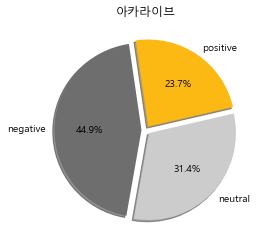

In [19]:
ratio = [4484,  2366,3134]
labels = ['negative', 'positive', 'neutral']
explode = [0.05, 0.05, 0.05]
colors = ['#6E6E6E', '#FDB913', '#CCCCCC']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title("아카라이브")
plt.show()

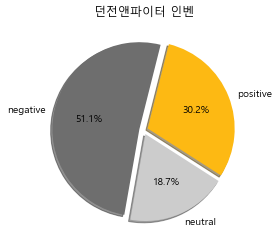

In [20]:
ratio = [134,  79,49]
labels = ['negative', 'positive', 'neutral']
explode = [0.05, 0.05, 0.05]
colors = ['#6E6E6E', '#FDB913', '#CCCCCC']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title("던전앤파이터 인벤")
plt.show()

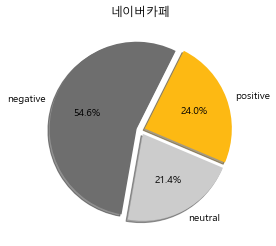

In [22]:
ratio = [2731, 1199,1070]
labels = ['negative', 'positive', 'neutral']
explode = [0.05, 0.05, 0.05]
colors = ['#6E6E6E', '#FDB913', '#CCCCCC']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title("네이버카페")
plt.show()

In [23]:
new

,Column1,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용,감성점수,emotion,사이트
0,6646,rintia,2022-01-17 3:36,2689.0,16,https://arca.live/b/dunfa/42607488?target=all&...,1. 스킬 이펙트 조정던파는 설정에 들어가면 캐릭터 이팩트 투명도를 조절할 수 있다...,알면 유용하지만 인게임에서 알려주지 않는 팁(뉴비용),알면 유용하지만 인게임에서 알려주지 않는 팁(뉴비용)1. 스킬 이펙트 조정던파는 설...,27,positive,arca
1,11119,[]퍼섭에 뭐가나올지?? 그리고 현재 던파...?,NaN,NaN,183,https://cafe.naver.com/dfither/21521042,1. 파밍 개선 - 이건 필수라고 생각함1)100렙제 에픽 신화 파밍도인제 1년 3...,퍼섭에 뭐가나올지?? 그리고 현재 던파...?,퍼섭에 뭐가나올지?? 그리고 현재 던파...?1. 파밍 개선 - 이건 필수라고 생각...,21,positive,naver
2,11474,[자랑주의]평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음,NaN,NaN,266,https://cafe.naver.com/dfither/21440097,1월 중순 복귀하고 학생때부터 키워보고싶엇던 인파 시작 ㄱㄱ함 최근 일주일 운빨이 ...,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음1월 중...,19,positive,naver
3,586,켁븜,2022-04-19 3:42,38.0,0,https://arca.live/b/dunfa/48747897?target=all&...,105제 유니크 + 시나에서 주워온 누더기들105제 8강 시나리오마부 덕지덕지 윤명...,열심히 겜하는 뉴비,열심히 겜하는 뉴비105제 유니크 + 시나에서 주워온 누더기들105제 8강 시나리오...,18,positive,arca
4,5820,쇼콜라,2022-01-23 9:10,5215.0,41,https://arca.live/b/dunfa/43013657?target=all&...,일단 본인은 던파 52일차 뉴비 오즈마1단 하로코 아다를 어제 뗀 참이다그전엔 70...,메이플 로아와 비교해서 파의 장점,메이플 로아와 비교해서 파의 장점일단 본인은 던파 52일차 뉴비 오즈마1단 하로코 ...,16,positive,arca
...,...,...,...,...,...,...,...,...,...,...,...,...
15241,4043,뉴비새기,2022-02-21 11:56,36.0,0,https://arca.live/b/dunfa/44897493?target=all&...,새시즌 열리면 무조건 유저 유입 많고이벤트도 빵빵하게 할거란 말이지신케 떡밥은 잘모...,새 시즌 기대 반 불안 반인데 ㄹㅇ 폭풍전야네,새 시즌 기대 반 불안 반인데 ㄹㅇ 폭풍전야네새시즌 열리면 무조건 유저 유입 많고이...,-22,negative,arca
15242,4765,뉴비새기,2022-02-06 11:43,51.0,0,https://arca.live/b/dunfa/43934563?target=all&...,아라드 어드벤처도 이런건 대체 왜 만든거지? 싶었는데나중에 게임하다보니까 이거라두 ...,담 시즌 잘나왔음 좋겟네 파 할거 많은데 할거없는듯,담 시즌 잘나왔음 좋겟네 파 할거 많은데 할거없는듯아라드 어드벤처도 이런건 대체 왜...,-22,negative,arca
15243,4910,뉴비새기,2022-02-04 6:43,148.0,1,https://arca.live/b/dunfa/43796432?target=all&...,근처에 저런 여자들 보면 다 똑같음페미가 남자들 고추 크기나 남자애들 잠재적 성범죄...,페미드립+한남 6.9cm 이런애들 항상 발정나있으니까 조심하셈,페미드립+한남 6.9cm 이런애들 항상 발정나있으니까 조심하셈근처에 저런 여자들 보...,-24,negative,arca
15244,4855,뉴비새기,2022-02-05 6:20,82.0,-4,https://arca.live/b/dunfa/43863304?target=all&...,"해외에서 전문가가 비건, 동물 보호 이전에먼저 개개인이 행동에 책임감을 가지라고 했...",무책임의 시대에서 쓸데없는 애국심이나 책임감 가지지 마셈,"무책임의 시대에서 쓸데없는 애국심이나 책임감 가지지 마셈해외에서 전문가가 비건, 동...",-29,negative,arca


In [24]:
new.to_csv('D:/project/2022/주원포폴/001네오플/네오플/4. 데이터 가공/신규/신규유저데이터_감성분석_사이트.csv')

## 복귀 데이터 감성분석 시각화

### 데이터 로드

In [4]:
back= pd.read_csv('D:/project/2022/주원포폴/001네오플/네오플/4. 데이터 가공/복귀/복귀유저데이터_감성분석.csv')
back

,Column1,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용,감성점수,emotion
0,11040,연장,2021-04-14 7:42,4322,1,https://arca.live/b/dunfa/24483044?target=all&...,https://arca.live/b/dunfa/24408321위 링크에 이어 쓰는 ...,두서없고 의식의 흐름대로 쓰는공략2 - 100까지 육성,두서없고 의식의 흐름대로 쓰는공략2 - 100까지 육성https://arca.liv...,25,positive
1,873,juss4784,2021-03-23 19:22,183,0,https://cafe.naver.com/dfither/21521042,1. 파밍 개선 - 이건 필수라고 생각함1)100렙제 에픽 신화 파밍도인제 1년 3...,퍼섭에 뭐가나올지?? 그리고 현재 던파...?,퍼섭에 뭐가나올지?? 그리고 현재 던파...?1. 파밍 개선 - 이건 필수라고 생각...,21,positive
2,11042,연장,2021-04-13 3:14,1378,6,https://arca.live/b/dunfa/24408321?target=all&...,일단 본인은 05년부터쭉하다가 17년중반때 접고 딴겜했다가 궁둥이 터져서 복귀해가지...,두서없고 의식의 흐름대로 쓰는공략1 - 파입문편,두서없고 의식의 흐름대로 쓰는공략1 - 파입문편일단 본인은 05년부터쭉하다가 17년...,21,positive
3,1228,쁘이,2021-02-10 1:04,266,0,https://cafe.naver.com/dfither/21440097,1월 중순 복귀하고 학생때부터 키워보고싶엇던 인파 시작 ㄱㄱ함 최근 일주일 운빨이 ...,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음1월 중...,19,positive
4,6775,홍련77,2022-03-02 8:36,1916,1,https://arca.live/b/dunfa/45463736?target=all&...,전직업 만렙+ 몇개더 만렙임다음 시즌에 사령 여렝거 장군님 세라핌 + 알파 들고갈건...,전직업만렙+알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점,전직업만렙+알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점전직업 만렙+ 몇개더 ...,19,positive
...,...,...,...,...,...,...,...,...,...,...,...
11126,7736,rintia,2022-01-16 16:58,2559,52,https://arca.live/b/dunfa/42592307?target=all&...,최근 신캐 출시며 여러 이벤트로 신규/복귀 유저들이 많이 늘었음.챈만 봐도 질문글 ...,이번 이벤트를 통해 본 파의 가이드 고찰(장문/세줄요약),이번 이벤트를 통해 본 파의 가이드 고찰(장문/세줄요약)최근 신캐 출시며 여러 이벤...,-20,negative
11127,5541,클레이모어,2022-04-21 18:21,2212,25,https://arca.live/b/dunfa/48945689?target=all&...,86렙이 만렙이였던 시절씨팔 헬에 목숨건 병신새끼마냥 헬만 주구장창 돌고있었음 넨마...,파 복귀하 친구 손절한 썰,파 복귀하 친구 손절한 썰86렙이 만렙이였던 시절씨팔 헬에 목숨건 병신새끼마냥 헬만...,-22,negative
11128,6779,Prless,2022-03-02 6:28,524,0,https://arca.live/b/dunfa/45456327?target=all&...,마법봉인 장비 * 100Lv 마법봉인 장비 아이템 옵션 및 모험가 명성 수치가 변경...,장비 변경 사항 2,장비 변경 사항 2마법봉인 장비 * 100Lv 마법봉인 장비 아이템 옵션 및 모험가...,-23,negative
11129,7311,흐르미,2022-01-29 19:51,386,2,https://arca.live/b/dunfa/43468304?target=all&...,나는 어떤 길드의 부길마임 ㅇㅇ어떤 사정에 의해서 어찌저찌 오즈마 길드 공대를 운영...,길공 때문에 강퇴 시키고 싶은놈이 있는데....,길공 때문에 강퇴 시키고 싶은놈이 있는데....나는 어떤 길드의 부길마임 ㅇㅇ어떤 ...,-27,negative


### 데이터 정제 
  - '사이트'라는 열 생성
  - 수집된 데이터의 '주소'열의 url을 사용해 사이트의 주소 판단 및 값 생성 

In [26]:
back['사이트']=''
for i in range(len(back)):
    if 'arca.live' in back['주소'][i]:
        back['사이트'][i]='arca'
    elif 'naver' in back['주소'][i]:
        back['사이트'][i]='naver'
    if 'inven' in back['주소'][i]:
        back['사이트'][i]='inven'

In [27]:
back.groupby(['사이트','emotion']).size()

사이트    emotion 
arca   negative    2645
       neutral     1286
       positive    1707
inven  negative     226
       neutral      111
       positive     156
naver  negative    2731
       neutral     1070
       positive    1199
dtype: int64

### 데이터 시각화

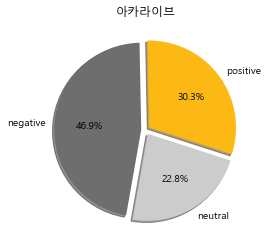

In [28]:
ratio = [2645,  1707,1286]
labels = ['negative', 'positive', 'neutral']
explode = [0.05, 0.05, 0.05]
colors = ['#6E6E6E', '#FDB913', '#CCCCCC']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title("아카라이브")
plt.show()

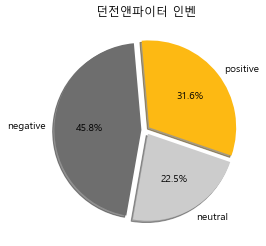

In [29]:
ratio = [226, 156,111]
labels = ['negative', 'positive', 'neutral']
explode = [0.05, 0.05, 0.05]
colors = ['#6E6E6E', '#FDB913', '#CCCCCC']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title("던전앤파이터 인벤")
plt.show()

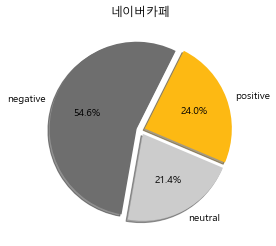

In [30]:
ratio = [2731, 1199,1070]
labels = ['negative', 'positive', 'neutral']
explode = [0.05, 0.05, 0.05]
colors = ['#6E6E6E', '#FDB913', '#CCCCCC']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title("네이버카페")
plt.show()

In [31]:
back.to_csv('D:/project/2022/주원포폴/001네오플/네오플/4. 데이터 가공/복귀/복귀유저데이터_감성분석_사이트.csv')

## 월별 감성분석 시각화

### 데이터 프레임 생성
  - 'dd'라는 데이터 프레임 생성해 '2021'년도의 데이터만 넣음
  - 'month'라는 열 생성해 글이 쓰인 월의 데이터를 넣음
  - 기존꺼에서 데이터를 뽑아 넣은 것이므로 reset_index로 데이터 인덱스 리셋 필요
  - 신규 데이터의 데이터 분포가 굉장히 편향된 경향을 보여 적절하지 않다고 판단해 제외. 복귀유저 데이터로만 분석 진행

In [139]:
dd = pd.DataFrame({})

In [140]:
for i in range(len(new)):
    try:
        if back['등록일'][i][:4]=='2021':
            dd=dd.append(back.iloc[i])
    except:
        continue

In [142]:
dd['month']=''

In [143]:
dd = dd.reset_index()
dd

,index,Column1,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용,감성점수,emotion,month
0,8,9016.0,Paizuri,2021-12-12 5:00,229.0,2.0,https://arca.live/b/dunfa/40195844?target=all&...,던전 앤 파이터를 플레이해주셔서 감사합니다. 아래 기재된 규칙은 쾌적한 게임에 필수...,파 뉴비 가이드,파 뉴비 가이드던전 앤 파이터를 플레이해주셔서 감사합니다. 아래 기재된 규칙은 쾌적...,12.0,positive,
1,13,9009.0,SSS급초보자,2021-12-12 7:24,295.0,0.0,https://arca.live/b/dunfa/40203780?target=all&...,100렙찍는 이벤트 가볍게하길래 함 찍어먹어볼라는데 무난무난하게 파밍하기좋고 컨텐츠...,응애 냉동뉴비 직업추천좀,응애 냉동뉴비 직업추천좀100렙찍는 이벤트 가볍게하길래 함 찍어먹어볼라는데 무난무난...,11.0,positive,
2,19,8158.0,애기븜레응애,2021-12-29 8:52,237.0,2.0,https://arca.live/b/dunfa/41372000?target=all&...,1단계 레벨을 올리는 단계시나리오를 미는 것 자체가 재미있다2단계 헬파티에 입문하는...,애기뉴비가 썩은물이 되는 7가지 단계.timeline,애기뉴비가 썩은물이 되는 7가지 단계.timeline1단계 레벨을 올리는 단계시나리...,10.0,positive,
3,20,8341.0,SQ,2021-12-25 10:25,281.0,0.0,https://arca.live/b/dunfa/41117898?target=all&...,지금 던파메타가 선택앤파이터라고 불릴정도로선택이 사기라서 많은 캐릭들이 선택을 끼고...,헬파밍하고 있는 뉴비를 위한 짧은팁,헬파밍하고 있는 뉴비를 위한 짧은팁지금 던파메타가 선택앤파이터라고 불릴정도로선택이 ...,10.0,positive,
4,21,9062.0,은씨네장녀,2021-12-10 13:31,1039.0,2.0,https://arca.live/b/dunfa/40101981?target=all&...,여캐는 사실상 거의 야추가 꼴리는게 중요함자신의 성취향에맞게 고르면됨나는 강한여성이...,뉴비들 여캐 고를때팁,뉴비들 여캐 고를때팁여캐는 사실상 거의 야추가 꼴리는게 중요함자신의 성취향에맞게 고...,10.0,positive,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,15213,8095.0,워렉,2021-12-30 18:59,208.0,0.0,https://arca.live/b/dunfa/41475602?target=all&...,뉴비도 살 수 있는 환경을 만들어야 해시나리오는 마봉으로 돌 수 있어야 하고110시...,난이도 완화가 필요해,난이도 완화가 필요해뉴비도 살 수 있는 환경을 만들어야 해시나리오는 마봉으로 돌 수...,-15.0,negative,
2297,15214,8321.0,만크,2021-12-25 16:20,3096.0,18.0,https://arca.live/b/dunfa/41140524?target=all&...,2022-01-19 수정요즘 채널에 뉴비랑 복귀도 좀 보이는거같고버서커 공략글도 없...,만크 버또 공략,만크 버또 공략2022-01-19 수정요즘 채널에 뉴비랑 복귀도 좀 보이는거같고버서...,-15.0,negative,
2298,15221,9275.0,ggwp,2021-12-02 12:11,184.0,0.0,https://arca.live/b/dunfa/39556542?target=all&...,좀 장문임일단 이 글은 념글에 인성 박살난 소마 글 보고 쓴다내가 글 쓴 목적이 박...,념글보니 오프 딜 맹신하는 사람들이 많은 것 같아서 글 써봄,념글보니 오프 딜 맹신하는 사람들이 많은 것 같아서 글 써봄좀 장문임일단 이 글은 ...,-16.0,negative,
2299,15223,9028.0,굴다리의싱하형,2021-12-11 12:53,829.0,10.0,https://arca.live/b/dunfa/40160557?target=all&...,일단 이 글을 눌렀다는건항상 챈결이 열리는데결알못이라 들어갈까 말까 고민하는 누비로...,챈결 유입을 위한 결투장 가이드(아마 스압일걸?),챈결 유입을 위한 결투장 가이드(아마 스압일걸?)일단 이 글을 눌렀다는건항상 챈결이...,-17.0,negative,


In [144]:
for i in range(len(dd)):
    dd['month'][i]=dd['등록일'][i][5:7]

### 데이터 값 확인
  - groupby를 이용해 월별로 'emotion'을 묶어 개수 count

In [145]:
date = dd.groupby(['month','emotion']).count()

### 시각화
  - 막대그래프를 이용해 시각화
  - negative : #00066 , neutral : #6E6E6E , positive : #FDB913 으로 색 지정

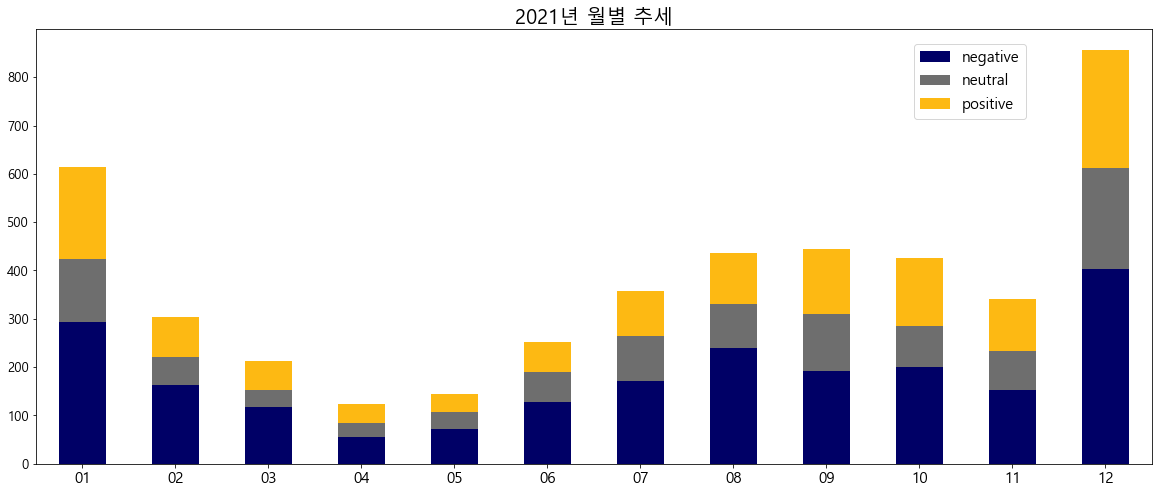

In [102]:
employees=['01','02','03','04','05','06','07','08','09','10','11','12']
earnings={
     "negative":[294,164,117,55,71,127,172,239,192,200,153,404],
     "neutral":[129,57,36,30,36,63,93,92,117,86,80,209],
     "positive":[191,83,60,39,37,63,92,106,135,139,109,244],
 }
color = ['#000066','#6E6E6E','#FDB913']
df=pd.DataFrame(earnings,index=employees)

df.plot(kind="bar",stacked=True,figsize=(20,8),color=color)
plt.title("2021년 월별 추세",size = 20)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=13)
plt.legend(loc="center left",bbox_to_anchor=(0.78,0.88),fontsize=15)
plt.show()

### 01, 12월 데이터 내보내기
  -  01,12월의 값이 두드러지게 크기 때문에, 자세히 살펴보기 위해 데이터 csv 파일로 내보냄

In [147]:
aa= pd.DataFrame({})

In [148]:
bb= pd.DataFrame({})

In [66]:
for i in range(len(back)):
    if back['등록일'][i][:4]=='2021' and back['등록일'][i][5:7]=='01':
        aa = aa.append(back.iloc[i])
aa

,Column1,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용,감성점수,emotion,month
133,10911.0,클라이덴,2021-06-02 6:37,47.0,0.0,https://arca.live/b/dunfa/27396856?target=all&...,오퍼레이션 레이즈 타점 개선하고 딜도 좀 올려줬겠지?온갖 행복회로 다 돌리고 있었는...,밸패하면 복귀하려고 했는데 시발 ㅋㅋ,밸패하면 복귀하려고 했는데 시발 ㅋㅋ오퍼레이션 레이즈 타점 개선하고 딜도 좀 올려줬...,6.0,positive,06
296,10827.0,생루이눈나맘마통,2021-06-16 14:51,143.0,0.0,https://arca.live/b/dunfa/28307771?target=all&...,여태까지 열심히달려온애들은 죤나 허망하겟다,파 이제시작하고 반년하고접엇다가 다시복귀한 나는 이득이지만,파 이제시작하고 반년하고접엇다가 다시복귀한 나는 이득이지만여태까지 열심히달려온애들은...,5.0,positive,06
297,10893.0,콘챠,2021-06-05 21:37,87.0,0.0,https://arca.live/b/dunfa/27631666?target=all&...,보닌 지금 던파 복귀한지 딱 2달째인데이시스 졸업하고 접어서 어느 정도 베이스 있었...,새벽에 뉴비 떡밥이였네,새벽에 뉴비 떡밥이였네보닌 지금 던파 복귀한지 딱 2달째인데이시스 졸업하고 접어서 ...,5.0,positive,06
305,722.0,leeyh,2021-06-08 12:50,264.0,0.0,https://cafe.naver.com/dfither/21537375,복귀한 던린이입니다.이번 이벤트로 클리파 돌아서 무희신화 먹었는데 어떤가요? 메가...,남레인저 무희신화 어떤가요??,남레인저 무희신화 어떤가요??복귀한 던린이입니다.이번 이벤트로 클리파 돌아서 무희신...,4.0,positive,06
476,10752.0,워렉,2021-06-29 20:53,210.0,0.0,https://arca.live/b/dunfa/29097979?target=all&...,이번에 복귀해서 뭐부터 해야할 지 모르겠어서 한 번 정리해보려고 하는데명성 수치에 ...,파 파밍 순서도 만들고 있는데,파 파밍 순서도 만들고 있는데이번에 복귀해서 뭐부터 해야할 지 모르겠어서 한 번 정...,4.0,positive,06
...,...,...,...,...,...,...,...,...,...,...,...,...
11056,10835.0,체일,2021-06-14 17:09,310.0,0.0,https://arca.live/b/dunfa/28189873?target=all&...,던페때 초대장이랑 탐지석 퍼준다고 그때 복귀한게 실수였는데헬도는데 테이가 몇개씩 떨...,내가 할렘 시절 개망한 이유가,내가 할렘 시절 개망한 이유가던페때 초대장이랑 탐지석 퍼준다고 그때 복귀한게 실수였...,-9.0,negative,06
11057,10909.0,간식,2021-06-02 9:20,448.0,0.0,https://arca.live/b/dunfa/27407170?target=all&...,여캐충인데 도적 어려워서 포기했음ㅋㅋ옛날부터 게임이 병신같아도 일단 겜하는 손맛 자...,옛날사람인데 파생각 자주남,옛날사람인데 파생각 자주남여캐충인데 도적 어려워서 포기했음ㅋㅋ옛날부터 게임이 병신같...,-9.0,negative,06
11078,716.0,또남,2021-06-10 6:21,646.0,1.0,https://cafe.naver.com/dfither/21537633,복귀3일차 할렘나오고 접은사람입니다기존에 있던에픽들(할렘픽 잡에픽)같은거 필요없다고...,육성의뢰했는데...,육성의뢰했는데...복귀3일차 할렘나오고 접은사람입니다기존에 있던에픽들(할렘픽 잡에픽...,-11.0,negative,06
11087,10860.0,TheEvo,2021-06-10 14:14,3164.0,3.0,https://arca.live/b/dunfa/27941418?target=all&...,"하고 있는 직업은 맞지만, 복귀한 지 얼마 안된 던린이인 점 인지해주면 감사합니다....",패황 공략 (드디어 대강 완료) 긴글주의! 데이터 존나 주의,패황 공략 (드디어 대강 완료) 긴글주의! 데이터 존나 주의하고 있는 직업은 맞지만...,-11.0,negative,06


In [69]:
for i in range(len(back)):
    if back['등록일'][i][:4]=='2021' and back['등록일'][i][5:7]=='12':
        bb = bb.append(back.iloc[i])
bb

,Column1,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용,감성점수,emotion,month
8,9539.0,SQ,2021-10-18 2:37,210.0,0.0,https://arca.live/b/dunfa/36346774?target=all&...,복귀하고 한번도 안해봤던 닼나를 1렙부터 키우면서 닼나 관련 정보를 이것저것 많이 ...,복귀 뉴비닼나의 느낀점,복귀 뉴비닼나의 느낀점복귀하고 한번도 안해봤던 닼나를 1렙부터 키우면서 닼나 관련 ...,12.0,positive,10
77,9429.0,짜다,2021-10-28 8:39,139.0,0.0,https://arca.live/b/dunfa/37056853?target=all&...,과거 개똥캐 남런처를 키우고 신이계를 여런만 받고 남런은 차별하는게 개ㅈ같아서 접고...,복귀뉴비 파 한달째 감상문,복귀뉴비 파 한달째 감상문과거 개똥캐 남런처를 키우고 신이계를 여런만 받고 남런은 ...,7.0,positive,10
78,9526.0,Kyyyyyaa,2021-10-18 18:01,245.0,0.0,https://arca.live/b/dunfa/36396713?target=all&...,메 로아 하다가 예전 던파 향수 땜에 복귀하려하는데 뉴비 가이드 보니까 신기한거 많...,뉴비 지금 할만함??,뉴비 지금 할만함??메 로아 하다가 예전 던파 향수 땜에 복귀하려하는데 뉴비 가이드...,7.0,positive,10
79,9542.0,와샌드걸,2021-10-17 14:03,82.0,0.0,https://arca.live/b/dunfa/36324177?target=all&...,라핌 쩔받다가 드나 쩔러보고 존나 멋있어서 드나 키우기 시작했는데 이제 내가 쩔할때...,작년 파 복귀했을때,작년 파 복귀했을때라핌 쩔받다가 드나 쩔러보고 존나 멋있어서 드나 키우기 시작했는데...,7.0,positive,10
88,448.0,프라임로봇왕,2021-10-01 4:09,207.0,0.0,https://cafe.naver.com/dfither/21550549,"어제, 9월 30일 업데이트 이후로 캐릭터 돌리다가 블레이드 재미없어서 그냥 놔두었...","탈리스만, 아바타, 지혜의인도 어떤 캐릭터에게 주어야 잘 주었다고 소문날까?","탈리스만, 아바타, 지혜의인도 어떤 캐릭터에게 주어야 잘 주었다고 소문날까?어제, ...",6.0,positive,10
...,...,...,...,...,...,...,...,...,...,...,...,...
11015,9596.0,Cerulean,2021-10-12 16:11,204.0,0.0,https://arca.live/b/dunfa/35996990?target=all&...,퍼뎀캐 5개중 3캐릭이 무기가 2개씩임스태프쓰던 엘마 복귀하니까스태프 옵 다 장애인...,ㅋㅋ 난 직업도 좆같은것들 골라서,ㅋㅋ 난 직업도 좆같은것들 골라서퍼뎀캐 5개중 3캐릭이 무기가 2개씩임스태프쓰던 엘...,-8.0,negative,10
11016,9688.0,짜다,2021-10-05 11:04,135.0,0.0,https://arca.live/b/dunfa/35506716?target=all&...,그러니 도움이 필요합니다다름이 아니고 복귀유저인데 버퍼이벤중이라서 버퍼 키우고 있는...,나 진짜진짜 심각하게 고민중임,나 진짜진짜 심각하게 고민중임그러니 도움이 필요합니다다름이 아니고 복귀유저인데 버퍼...,-8.0,negative,10
11050,9643.0,RRRRRR,2021-10-09 16:02,104.0,0.0,https://arca.live/b/dunfa/35792933?target=all&...,그때 잠깐 븝퍼랑 검커궁금해서 복귀했었는데최종템파밍루트가 테이베르스 단 하나밖에 없...,걍 95제는 개씹좆망시즌임,걍 95제는 개씹좆망시즌임그때 잠깐 븝퍼랑 검커궁금해서 복귀했었는데최종템파밍루트가 ...,-9.0,negative,10
11100,9420.0,YMK,2021-10-29 7:24,56.0,1.0,https://arca.live/b/dunfa/37118387?target=all&...,본인 해병대지만 기수는 밝히진 않겟음대충 내가 일병말때 7기수밑에 후임이하나 들어옴...,다들 군대썰푸니 나도 후임썰 약간장문?,다들 군대썰푸니 나도 후임썰 약간장문?본인 해병대지만 기수는 밝히진 않겟음대충 내가...,-12.0,negative,10


In [107]:
aa.to_csv("tt.csv",encoding='utf-8')
bb.to_csv("one.csv",encoding='utf-8')